
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Download the fashion mnist dataset using Keras.**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [3]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
x_train[8].shape

(28, 28)

In [5]:
x_train[10].shape

(28, 28)

In [6]:
x_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          3,   1,   0,   0,   1,   1,   0,   0,   0,   0,  58,   0,  39,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          3,   0,   0,   0,   0,   0,   0,   0,  64, 109, 146, 192, 193,
          7,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,  94,  38,  99, 209, 183, 229, 192, 142,  48,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,  41,  45, 158, 146, 164, 114,  51,   1,  53, 105,  42,  36,
          0,   0],
       [  

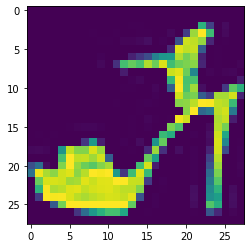

In [7]:
plt.imshow(x_train[9])

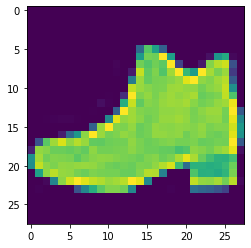

In [8]:
plt.imshow(x_train[15])

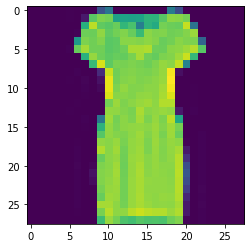

In [9]:
plt.imshow(x_train[20])

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [10]:
x_train[8].min()

0

In [11]:
x_train[8].max()

255

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [13]:
x_train[8].min()

0.0

In [14]:
x_train[8].max()

1.0

**Reshape the X into 4 dimension**

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [18]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [21]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
y_test.shape

(10000,)

In [23]:
y_train.shape

(60000,)

In [24]:
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)
y_test.shape

(10000, 10)

In [25]:
y_test.shape

(10000, 10)

In [26]:
y_train.shape

(60000, 10)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 17500)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2240128   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
_________________________________________________________________


###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [30]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test))


Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3917 - accuracy: 0.8659 - val_loss: 0.2977 - val_accuracy: 0.8945
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2554 - accuracy: 0.9099 - val_loss: 0.2868 - val_accuracy: 0.9001
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2159 - accuracy: 0.9227 - val_loss: 0.2710 - val_accuracy: 0.9050
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1905 - accuracy: 0.9326 - val_loss: 0.2896 - val_accuracy: 0.9061
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1706 - accuracy: 0.9390 - val_loss: 0.2914 - val_accuracy: 0.9096
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1558 - accuracy: 0.9446 - val_loss: 0.2946 - val_accuracy: 0.9118
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1421 - accuracy: 0.9506 - val_loss: 0.3521 -

**Plot values of metrics you used in your model.**

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.391741,0.865900,0.297703,0.8945
1,0.255380,0.909900,0.286835,0.9001
2,0.215863,0.922717,0.271018,0.9050
3,0.190493,0.932583,0.289558,0.9061
4,0.170605,0.939000,0.291378,0.9096


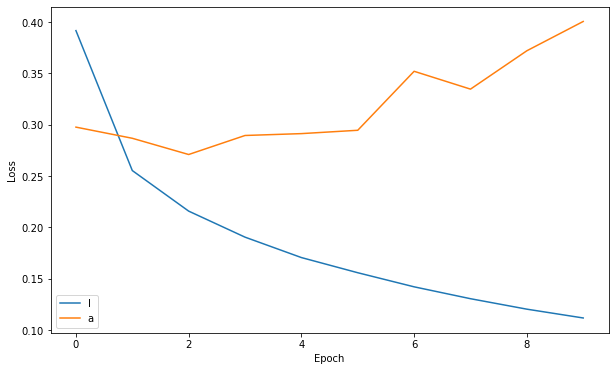

In [33]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

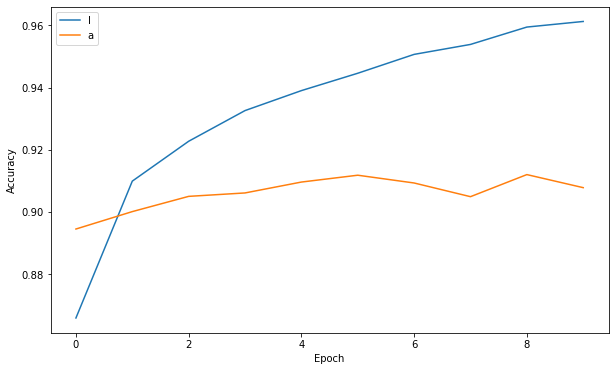

In [34]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [35]:
print(model.evaluate(x_test,y_test,verbose=1))

313/313 [==============================] - 1s 4ms/step - loss: 0.4007 - accuracy: 0.9078
[0.40065816044807434, 0.907800018787384]


**Train the model using earlystop.**

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [40]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1025 - accuracy: 0.9649 - val_loss: 0.3801 - val_accuracy: 0.9086
Epoch 2/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0949 - accuracy: 0.9679 - val_loss: 0.4208 - val_accuracy: 0.9090
Epoch 3/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0870 - accuracy: 0.9709 - val_loss: 0.4414 - val_accuracy: 0.9067


**Plot values of metrics you used in your model.**

In [41]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.102526,0.964867,0.380127,0.9086
1,0.094859,0.967883,0.420785,0.9090
2,0.086967,0.970900,0.441352,0.9067


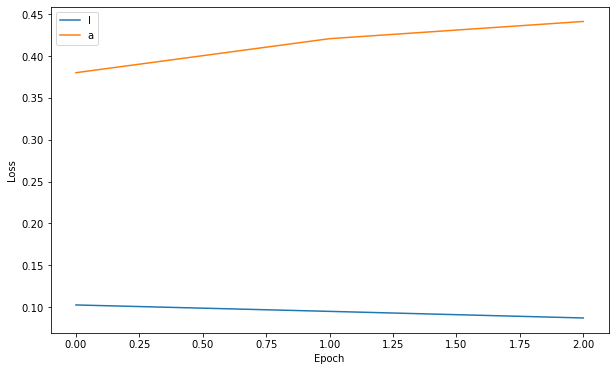

In [42]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

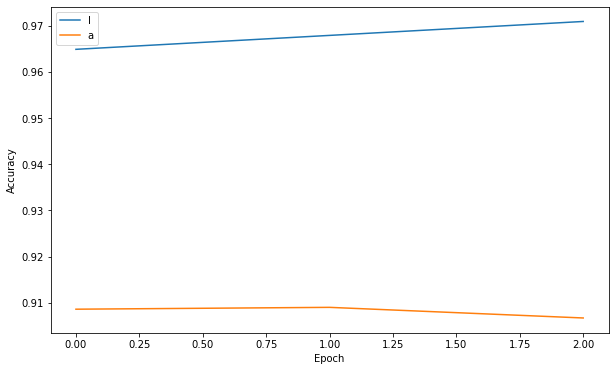

In [43]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

['loss', 'acc']

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
preds = model.predict(x_test)
preds

array([[1.9005038e-09, 2.1405387e-20, 1.4248294e-09, ..., 3.9435694e-05,
        1.2269780e-09, 9.9995935e-01],
       [4.3527305e-13, 0.0000000e+00, 1.0000000e+00, ..., 1.7911981e-17,
        7.2675651e-30, 1.5564899e-36],
       [5.6429677e-14, 1.0000000e+00, 4.7063377e-19, ..., 5.7013201e-19,
        1.7877935e-15, 2.7231363e-17],
       ...,
       [8.1640584e-18, 7.5100658e-35, 5.6261844e-24, ..., 2.9474047e-15,
        1.0000000e+00, 1.0725769e-31],
       [6.2096621e-16, 1.0000000e+00, 1.8952507e-22, ..., 3.0204940e-20,
        4.3776592e-20, 2.6625766e-14],
       [8.8504312e-05, 1.3456695e-07, 1.3815249e-04, ..., 3.1587389e-01,
        4.5044743e-03, 3.7603823e-03]], dtype=float32)

In [46]:
preds[0]

array([1.9005038e-09, 2.1405387e-20, 1.4248294e-09, 9.4059567e-20,
       3.0197771e-13, 1.1528365e-06, 1.3076404e-11, 3.9435694e-05,
       1.2269780e-09, 9.9995935e-01], dtype=float32)

In [47]:
predictions= np.argmax(preds, axis=1)

In [48]:
len(predictions)

10000

In [49]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [51]:
#print(confusion_matrix(y_test, predictions))

# Prediction

In [52]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4413522481918335
Test accuracy: 0.9067000150680542


In [54]:
my_number = x_test[6]

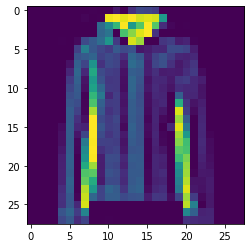

In [56]:
plt.imshow(my_number.reshape(28,28));

In [57]:
model.predict(my_number.reshape(1,28,28,1))

array([[1.0754902e-14, 7.3482924e-30, 6.5510186e-08, 8.4337036e-22,
        9.9999928e-01, 2.4100127e-19, 5.6212843e-07, 4.5921812e-17,
        8.5406835e-27, 2.4226014e-21]], dtype=float32)

In [58]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([4], dtype=int64)

# End of Assignment

In [59]:
model.save("cnn_image_fashion.h5")